In [1]:
import pandas as pd
import numpy as np 
import requests
import os
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Gather

In [2]:
#Get the twitter_archive_enhanced.csv - file in a dataframe
df_twitter_archive=pd.read_csv('twitter_archive_enhanced.csv')

In [3]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [4]:
df_twitter_archive['expanded_urls'][2335]

'https://twitter.com/dog_rates/status/666287406224695296/photo/1'

In [5]:
df_twitter_archive['text'][2335]

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [6]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
#Get the tsv- file with requests from the url
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

with open(os.path.join(url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [8]:
df_image_prediction=pd.read_csv(url.split('/')[-1],sep='\t')

In [9]:
df_image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
#acces Twitter API
consumer_key = 'FnJyi0QhQqMhkBvvWXP3J1vO8'
consumer_secret = 'EG4d2cOmjxnOL2kF1PubdB0e5w0iVJwlUuuYQaGZEAN9IY1NjH'
access_token = '1114558669474156544-dqLSdG2wBjkFAipkMxXorJOyIMZtYY'
access_secret = 'UE2BW67CGrZeoY6nxxC4bjSpd2Y0NTymM5sKKtZqtwCNj'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [12]:
tweet_ids=df_twitter_archive.tweet_id.tolist()
no_tweet_ids=[]

In [13]:
len(tweet_ids)

2356

In [14]:
len(no_tweet_ids)

0

In [15]:
#store jsons from twitter API in tweet_json.txt
with open('tweet_json.txt', 'w') as file:  
    for tweet_id in tweet_ids:
        try:
            tweet=api.get_status(tweet_id)
            file.write("%s\n" % json.dumps(tweet._json))
        except Exception as e:
            no_tweet_ids.append(tweet_id)

In [16]:
num_lines = sum(1 for line in open('tweet_json.txt'))

In [17]:
num_lines

2339

In [18]:
#read jsons from tweet_json.txt and convert into dataframe
tweepy_list=[]
i=0
with open('tweet_json.txt', encoding='utf-8') as file:
    while i<num_lines:
        i=i+1
        json_file_str=file.readline()[:-1]
        json_file = json.loads(json_file_str)
        tweet_id=json_file['id']        
        retweet_count=json_file['retweet_count']
        favorite_count=json_file['favorite_count']
        tweepy_list.append({'tweet_id': tweet_id,
                            'retweet_count': retweet_count,
                            'favorite_count': favorite_count})
df_tweepy=pd.DataFrame(tweepy_list,columns=['tweet_id','retweet_count','favorite_count'])

In [19]:
len(df_tweepy)

2339

In [20]:
df_tweepy

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8213,37676
1,892177421306343426,6074,32360
2,891815181378084864,4015,24377
3,891689557279858688,8369,40993
4,891327558926688256,9072,39197
5,891087950875897856,3010,19705
6,890971913173991426,1989,11522
7,890729181411237888,18244,63541
8,890609185150312448,4132,27091
9,890240255349198849,7132,31059


In [21]:
len(no_tweet_ids)

17

In [22]:
1471+885

2356

# Assess

In [23]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [24]:
df_twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [25]:
df_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [26]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [27]:
df_twitter_archive.name.value_counts()

None           745
a               55
Charlie         12
Oliver          11
Cooper          11
Lucy            11
Tucker          10
Penny           10
Lola            10
Bo               9
Winston          9
Sadie            8
the              8
Toby             7
Bailey           7
Buddy            7
Daisy            7
an               7
Leo              6
Oscar            6
Scout            6
Koda             6
Stanley          6
Bella            6
Milo             6
Dave             6
Jack             6
Rusty            6
Jax              6
Finn             5
              ... 
Harrison         1
Peanut           1
Craig            1
Kona             1
Grey             1
Aldrick          1
Chuq             1
Sully            1
Alf              1
Rooney           1
Raphael          1
Goose            1
Willem           1
Lolo             1
Leonidas         1
Rufio            1
Doobert          1
Dallas           1
Frönq            1
Burt             1
Bobb             1
Kallie      

In [28]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [29]:
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [30]:
df_tweepy.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8213,37676
1,892177421306343426,6074,32360
2,891815181378084864,4015,24377
3,891689557279858688,8369,40993
4,891327558926688256,9072,39197


In [31]:
df_tweepy.tail()

,tweet_id,retweet_count,favorite_count
2334,666049248165822465,42,105
2335,666044226329800704,136,290
2336,666033412701032449,43,121
2337,666029285002620928,46,125
2338,666020888022790149,496,2517


In [32]:
sum(df_tweepy.tweet_id.duplicated())

0

In [33]:
df_tweepy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null int64
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [34]:
df_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [35]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality Issues:
- Tweets, which are replys or retweets, should not be included in the analysis: twitter archive check
- replys and retweet columns are unnecessary for the analysis check
- Some Rating numbers arent correct: twitter archive
- names are not correctly, e.g. "a" check
- Some Dogo-Classifications are not extracted correctly, e.g. if doggos is used in text its not classified as doggo. blep and snooter are missing completly as possible  dog stages classification : twitter archive check
- time is displayed as string: twitter archive check
- id's are stored as integer' check
- column names are not easy to understand in df_image_prediction check
- only use tweets, which contain full information, since tweepy-info contains only 885 entries
- Sources have cryptic names, check

### Tidiness Issues:
- doggo attribute should be a dummyvariables once extracted, to anable logisitc regression models: twitter archive check
- tables are not apropiate. One big table for easy analysisfor storing purpose three different tables should be use, one for tweet data one for picture data and one for dogo data

# Clean

In [36]:
# generate a copy of each dataframe to keep the original 
df_twitter_archive_clean=df_twitter_archive.copy()
df_image_prediction_clean=df_image_prediction.copy()
df_tweepy_clean=df_tweepy.copy()

### Quality

#### Tweets, which are replys or retweets, should not be included in the analysis

#### Define

Drop all Rows in the twitter archive table, which have an entry in the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id or retweeted_status_user_id.

#### Code

In [37]:
df_twitter_archive_clean=df_twitter_archive_clean.query('in_reply_to_status_id.isnull() & in_reply_to_user_id.isnull() & retweeted_status_id.isnull() & retweeted_status_user_id.isnull()', engine='python')

#### Test

In [38]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

#### time is stored as string

#### Define

change datatype to timestamp from string

#### Code

In [39]:
df_twitter_archive_clean.timestamp=pd.to_datetime(df_twitter_archive_clean.timestamp)

#### Test

In [40]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

#### Sources have cryptic names

#### Define

Apply a function that converts the cryptic names of the sources to Twitter for I-Phone, Vine - Make a Scene, Twitter Web Client and TweetDeck

#### Code

In [41]:
#Mapping from cryptic name to full source name
sources={'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter for I-Phone',
               '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine-Make a Scene',
               '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
               '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TwitterDeck'}


# Function to apply
def get_full_source(tweet):
    if tweet['source'] in sources.keys():
        source = sources[tweet['source']]
        return source
    else:
        return tweet['source']
    
df_twitter_archive_clean['source'] = df_twitter_archive_clean.apply(get_full_source, axis=1)


#### Test

In [42]:
df_twitter_archive_clean.source.value_counts()

Twitter for I-Phone    1964
Vine-Make a Scene        91
Twitter Web Client       31
TwitterDeck              11
Name: source, dtype: int64

#### replys and retweet columns are unnecessary for the analysis

#### Define

drop the *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id*, *retweeted_status_user_id* and *retweeted_status_timestamp * columns

#### Code

In [43]:
df_twitter_archive_clean.drop(columns=['in_reply_to_status_id',
                                       'in_reply_to_user_id',
                                       'retweeted_status_id',
                                       'retweeted_status_user_id',
                                       'retweeted_status_timestamp'] ,axis=1, inplace=True)

#### Test

In [44]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


In [45]:
df_twitter_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for I-Phone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for I-Phone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for I-Phone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for I-Phone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for I-Phone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,Twitter for I-Phone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,Twitter for I-Phone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,Twitter for I-Phone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,Twitter for I-Phone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,Twitter for I-Phone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Some Dogo-Classifications are not extracted correctly,

#### Define

delete old columns to create dummy columns later, furthermore add a new column dog_desciption, which will contain the newly extracted dog_state

#### Code

In [46]:
df_twitter_archive_clean.drop(columns=['doggo',
                                       'floofer',
                                       'pupper',
                                       'puppo'] ,axis=1, inplace=True)

In [49]:
#function to extract the dog_type of the tweets-text
df_twitter_archive_clean['dog_type']=""
dog_stage=['doggo','floof','puppo','pup']

def dog_state_in_text(tweet):
    text=tweet['text']
    if dog_stage[0] in str.lower(text) and dog_stage[3] in str.lower(text):
        return 'multiple'
    elif dog_stage[0] in str.lower(text) and dog_stage[1] in str.lower(text):
        return 'multiple'
    elif dog_stage[1] in str.lower(text) and dog_stage[3] in str.lower(text):
        return 'multiple'
    elif dog_stage[0] in str.lower(text):
        return 'doggo'
    elif dog_stage[1] in str.lower(text):
        return 'floofer'
    elif dog_stage[2] in str.lower(text):
        return 'puppo'
    elif dog_stage[3] in str.lower(text):
        return 'pupper'
    else:
        return 'not classified'

    
df_twitter_archive_clean['dog_type'] = df_twitter_archive_clean.apply(dog_state_in_text, axis=1)    

#### Test

In [50]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_type              2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 163.8+ KB


In [51]:
df_twitter_archive_clean.dog_type.value_counts()

not classified    1476
pupper             465
doggo               71
floofer             34
puppo               28
multiple            23
Name: dog_type, dtype: int64

#### id's are stored as integer

#### Define

change the *tweet_id* columns in eacht table to a string variable

#### Code

In [52]:
df_twitter_archive_clean['tweet_id'] = df_twitter_archive_clean['tweet_id'].apply(str)
df_image_prediction_clean['tweet_id'] = df_image_prediction_clean['tweet_id'].apply(str)
df_tweepy_clean['tweet_id'] = df_tweepy_clean['tweet_id'].apply(str)

#### Test

In [53]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_type              2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 163.8+ KB


In [54]:
df_tweepy_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null object
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [55]:
df_image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### column names are not easy to understand in df_image_prediction

In [56]:
df_image_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define

rename each column after jpg_url appropriately

#### Code

In [57]:
df_image_prediction_clean.rename(index=str, columns={"img_num":"position_of_best_predicted_picture_in_tweet",
                                                     "p1": "number_1_prediction",
                                                     "p1_conf": "algorithm_confidence_prediction_1",
                                                     "p1_dog": "prediciton_1_is_dog",
                                                     "p2": "number_2_prediction",
                                                     "p2_conf": "algorithm_confidence_prediction_2",
                                                     "p2_dog": "prediciton_2_is_dog",
                                                     "p3": "number_3_prediction",
                                                     "p3_conf": "algorithm_confidence_prediction_3",
                                                     "p3_dog": "prediciton_3_is_dog"},inplace=True)

#### Test

In [58]:
df_image_prediction_clean.head()

,tweet_id,jpg_url,position_of_best_predicted_picture_in_tweet,number_1_prediction,algorithm_confidence_prediction_1,prediciton_1_is_dog,number_2_prediction,algorithm_confidence_prediction_2,prediciton_2_is_dog,number_3_prediction,algorithm_confidence_prediction_3,prediciton_3_is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### names are not correctly, e.g. "a"

#### Define

change wrong names to none, following values to change: a, the, an

#### Code

In [59]:
df_twitter_archive_clean.name.value_counts()

None           603
a               55
Lucy            11
Charlie         11
Oliver          10
Cooper          10
Penny            9
Tucker           9
Winston          8
the              8
Sadie            8
Lola             8
Daisy            7
Toby             7
Bo               6
Bailey           6
Oscar            6
Bella            6
an               6
Koda             6
Jax              6
Stanley          6
Milo             5
Leo              5
Scout            5
Louis            5
Buddy            5
Rusty            5
Dave             5
Chester          5
              ... 
Canela           1
Maya             1
Wesley           1
Ike              1
Jordy            1
Tuck             1
Kanu             1
infuriating      1
Cedrick          1
Kaiya            1
Major            1
Koko             1
Lili             1
Beebop           1
Link             1
Zeus             1
Grady            1
Rooney           1
Raphael          1
Goose            1
Willem           1
Lolo        

In [60]:
df_twitter_archive_clean.name.replace('a','None',inplace=True)
df_twitter_archive_clean.name.replace('the','None',inplace=True)
df_twitter_archive_clean.name.replace('an','None',inplace=True)

#### Test

In [61]:
df_twitter_archive_clean.name.value_counts()

None           672
Charlie         11
Lucy            11
Cooper          10
Oliver          10
Tucker           9
Penny            9
Sadie            8
Lola             8
Winston          8
Daisy            7
Toby             7
Koda             6
Bo               6
Stanley          6
Jax              6
Bailey           6
Oscar            6
Bella            6
Scout            5
Dave             5
Louis            5
Chester          5
Leo              5
Bentley          5
Rusty            5
Buddy            5
Milo             5
Gus              4
Alfie            4
              ... 
Canela           1
Maya             1
Wesley           1
Ike              1
Jordy            1
Tuck             1
Kanu             1
infuriating      1
Cedrick          1
Kaiya            1
Major            1
Koko             1
Lili             1
Beebop           1
Link             1
Zeus             1
Grady            1
Rooney           1
Raphael          1
Goose            1
Willem           1
Lolo        

#### Some Rating numbers arent correct: twitter archive

#### Define

Extract the correct rating numbers with the extract function

#### Code

In [62]:
#findall()[-1] used to extract the last .../... of the string to avoid issues and mistakes
df_twitter_archive_clean['rating']=df_twitter_archive_clean.text.str.findall('(\d{1,3}/\d{1,3})').str[-1]

In [63]:
df_twitter_archive_clean['rating']

0       13/10
1       13/10
2       12/10
3       13/10
4       12/10
5       13/10
6       13/10
7       13/10
8       13/10
9       14/10
10      13/10
11      13/10
12      13/10
13      12/10
14      13/10
15      13/10
16      12/10
17      13/10
18      13/10
20      12/10
21      13/10
22      14/10
23      13/10
24      13/10
25      12/10
26      13/10
27      13/10
28      13/10
29      12/10
31      13/10
        ...  
2326     2/10
2327     7/10
2328     9/10
2329    11/10
2330     6/10
2331     8/10
2332    10/10
2333     9/10
2334     3/10
2335     9/10
2336    11/10
2337    10/10
2338     1/10
2339    11/10
2340     8/10
2341     9/10
2342     6/10
2343    10/10
2344     9/10
2345    10/10
2346     8/10
2347     9/10
2348    10/10
2349     2/10
2350    10/10
2351     5/10
2352     6/10
2353     9/10
2354     7/10
2355     8/10
Name: rating, Length: 2097, dtype: object

In [64]:
df_twitter_archive_clean['rating_numerator'],df_twitter_archive_clean['rating_denominator']=df_twitter_archive_clean['rating'].str.split('/',1).str
df_twitter_archive_clean.drop(columns=['rating'] ,axis=1, inplace=True)
df_twitter_archive_clean.rating_numerator = pd.to_numeric(df_twitter_archive_clean.rating_numerator, errors='coerce')
df_twitter_archive_clean.rating_denominator = pd.to_numeric(df_twitter_archive_clean.rating_denominator, errors='coerce')

#### Test

In [65]:
df_twitter_archive_clean.rating_denominator.value_counts()

10     2085
80        2
50        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
Name: rating_denominator, dtype: int64

In [66]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_type              2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 163.8+ KB


In [67]:
df_twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56,Twitter for I-Phone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,not classified
1,892177421306343426,2017-08-01 00:17:27,Twitter for I-Phone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,pupper
2,891815181378084864,2017-07-31 00:18:03,Twitter for I-Phone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,not classified
3,891689557279858688,2017-07-30 15:58:51,Twitter for I-Phone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,not classified
4,891327558926688256,2017-07-29 16:00:24,Twitter for I-Phone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,not classified


In [68]:
df_twitter_archive_clean.rating_denominator.value_counts()

10     2085
80        2
50        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
Name: rating_denominator, dtype: int64

In [69]:
df_twitter_archive_clean.rating_numerator.value_counts()

12     486
10     429
11     414
13     289
9      152
8      101
7       53
14      39
6       33
5       33
3       19
4       16
2       10
1        5
24       1
26       1
165      1
60       1
44       1
144      1
80       1
84       1
88       1
121      1
204      1
420      1
776      1
27       1
45       1
75       1
99       1
0        1
Name: rating_numerator, dtype: int64

### Tidiness

- 1 doggo attribute should be a dummyvariables once extracted, to anable logisitc regression models: twitter archive
- 2 tables are not apropiate. One big table for easy analysis - for storing purpose three different tables should be use, one for tweet data one for picture data and one for dogo data

#### doggo attribute should be a dummyvariables once extracted, to anable logisitc regression models: twitter archive

#### Define

use .get_dummies to get dummiecolumns for the dogo type

#### Code

In [70]:
df_twitter_archive_clean.dog_type.value_counts()

not classified    1476
pupper             465
doggo               71
floofer             34
puppo               28
multiple            23
Name: dog_type, dtype: int64

In [71]:
df_twitter_archive_clean[['doggo','floofer','multiple','not_classified','pupper','puppo']]=pd.get_dummies(df_twitter_archive_clean.dog_type)
df_twitter_archive_clean.drop(columns=['dog_type'] ,axis=1, inplace=True)

#### Test

In [73]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null uint8
floofer               2097 non-null uint8
multiple              2097 non-null uint8
not_classified        2097 non-null uint8
pupper                2097 non-null uint8
puppo                 2097 non-null uint8
dtypes: datetime64[ns](1), int64(2), object(5), uint8(6)
memory usage: 159.7+ KB


#### tables are not apropiate. One big table for easy analysis - for storing purpose three different tables should be use, one for tweet data one for picture data and one for dogo data

#### Define

merge all three tables df_image_prediction_clean,

#### Code

In [74]:
df_image_prediction_clean.head()

,tweet_id,jpg_url,position_of_best_predicted_picture_in_tweet,number_1_prediction,algorithm_confidence_prediction_1,prediciton_1_is_dog,number_2_prediction,algorithm_confidence_prediction_2,prediciton_2_is_dog,number_3_prediction,algorithm_confidence_prediction_3,prediciton_3_is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [75]:
df_tweepy_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8213,37676
1,892177421306343426,6074,32360
2,891815181378084864,4015,24377
3,891689557279858688,8369,40993
4,891327558926688256,9072,39197


In [76]:
df_twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,multiple,not_classified,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for I-Phone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,0,0,0,1,0,0
1,892177421306343426,2017-08-01 00:17:27,Twitter for I-Phone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,0,0,0,0,1,0
2,891815181378084864,2017-07-31 00:18:03,Twitter for I-Phone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,0,0,0,1,0,0
3,891689557279858688,2017-07-30 15:58:51,Twitter for I-Phone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,0,0,0,1,0,0
4,891327558926688256,2017-07-29 16:00:24,Twitter for I-Phone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,0,0,0,1,0,0


In [77]:
df_final=pd.merge(df_tweepy_clean,df_image_prediction_clean,on='tweet_id', how='inner')

In [78]:
df_final=pd.merge(df_final,df_twitter_archive_clean,on='tweet_id', how='inner')

#### Test

In [79]:
df_final

,tweet_id,retweet_count,favorite_count,jpg_url,position_of_best_predicted_picture_in_tweet,number_1_prediction,algorithm_confidence_prediction_1,prediciton_1_is_dog,number_2_prediction,algorithm_confidence_prediction_2,...,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,multiple,not_classified,pupper,puppo
0,892420643555336193,8213,37676,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,0,0,0,1,0,0
1,892177421306343426,6074,32360,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,...,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,0,0,0,0,1,0
2,891815181378084864,4015,24377,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,0,0,0,1,0,0
3,891689557279858688,8369,40993,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,0,0,0,1,0,0
4,891327558926688256,9072,39197,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,0,0,0,1,0,0
5,891087950875897856,3010,19705,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,...,https://twitter.com/dog_rates/status/891087950...,13,10,None,0,0,0,1,0,0
6,890971913173991426,1989,11522,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,0,0,0,1,0,0
7,890729181411237888,18244,63541,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,...,https://twitter.com/dog_rates/status/890729181...,13,10,None,0,0,0,1,0,0
8,890609185150312448,4132,27091,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,0,0,0,1,0,0
9,890240255349198849,7132,31059,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,0,0,1,0,0,0


In [80]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 1967
Data columns (total 27 columns):
tweet_id                                       1968 non-null object
retweet_count                                  1968 non-null int64
favorite_count                                 1968 non-null int64
jpg_url                                        1968 non-null object
position_of_best_predicted_picture_in_tweet    1968 non-null int64
number_1_prediction                            1968 non-null object
algorithm_confidence_prediction_1              1968 non-null float64
prediciton_1_is_dog                            1968 non-null bool
number_2_prediction                            1968 non-null object
algorithm_confidence_prediction_2              1968 non-null float64
prediciton_2_is_dog                            1968 non-null bool
number_3_prediction                            1968 non-null object
algorithm_confidence_prediction_3              1968 non-null float64
prediciton_3_

In [81]:
df_final.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
19     2017-07-20 16:49:33
20     2017-07-19 16:06:48
21     2017-07-19 03:39:09
22     2017-07-19 00:47:34
23     2017-07-18 16:08:03
24     2017-07-18 00:07:08
25     2017-07-17 16:17:36
26     2017-07-16 23:58:41
27     2017-07-16 20:14:00
28     2017-07-15 23:25:31
29     2017-07-15 16:17:19
               ...        
1938   2015-11-17 00:24:19
1939   2015-11-17 00:06:54
1940   2015-11-16 23:23:41
1941   2015-11-16 21:54:18
1942   2015-11-16 21:10:36
1943   2015-11-16 20:32:58
1

In [82]:
df_final.shape

(1968, 27)

In [83]:
#store df_finale to twitter_archive_master.csv
df_final.to_csv('twitter_archive_master.csv')

# Analyse

### Does the mentioning of the "state" of the dogs result in different mean retweets and favorites? + linear model

calculate mean favourite and retweet count for all 5 dogo stages

In [124]:
df_doggo=df_final.query('doggo == 1')
df_doggo.favorite_count.mean()

19389.622950819674

In [85]:
df_doggo.retweet_count.mean()

7004.1803278688521

In [86]:
df_floofer=df_final.query('floofer == 1')
df_floofer.favorite_count.mean()

8317.46875

In [87]:
df_floofer.retweet_count.mean()

2690.8125

In [88]:
df_pupper=df_final.query('pupper == 1')
df_pupper.favorite_count.mean()

7586.3188073394494

In [89]:
df_pupper.retweet_count.mean()

2202.8646788990827

In [90]:
df_puppo=df_final.query('puppo == 1')
df_puppo.favorite_count.mean()

21753.444444444445

In [91]:
df_puppo.retweet_count.mean()

6044.1851851851852

In [92]:
df_multiple=df_final.query('multiple == 1')
df_multiple.favorite_count.mean()

15127.380952380952

In [93]:
df_multiple.retweet_count.mean()

4311.7142857142853

create linear model to investigate the influence of the dog state on the retweets and likes

In [94]:
df_final['intercept']=1
mod = sm.OLS(df_final['favorite_count'],df_final[['intercept','floofer','pupper','puppo','multiple']])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     9.430
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           1.50e-07
Time:                        14:59:10   Log-Likelihood:                -21375.
No. Observations:                1968   AIC:                         4.276e+04
Df Residuals:                    1963   BIC:                         4.279e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8693.1612    331.347     26.236      0.000    8043.331    9342.991
floofer     -375.6924   2256.449     -0.166      0.868   -4800.981    4049.596
pupper     -1106.8423    689.511     -1.605      0.109   -2459.093     245.409
puppo       1.306e+04   2452.369      5.326      0.000    8250.763    1.79e+04
multiple    6434.2198   2775.079      2.319      0.021     991.809    1.19e+04
==============================================================================
Omnibus:                     1850.418   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            88804.201
Skew:                           4.398   Prob(JB):                         0.00
Kurtosis:                      34.712   Cond. No.                         10.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

"doggo" is set as baseline. the result for "puppo" is statistical significant since p<0.05. Therefore the linear model says that the favourite count will increase by 13064 if the word puppo is included in the tweet compared to "doggo". the result for "multiple" is statistical significant since p<0.05. Therefore the linear model says that the favourite count will increase by 6434 if the multiple dog stages are included in the tweet compared to "doggo" However the R²-value is low so the quality of the regression is rather low.

In [95]:
df_final['intercept']=1
mod = sm.OLS(df_final['retweet_count'],df_final[['intercept','floofer','pupper','puppo','multiple']])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     5.218
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           0.000351
Time:                        15:05:32   Log-Likelihood:                -19421.
No. Observations:                1968   AIC:                         3.885e+04
Df Residuals:                    1963   BIC:                         3.888e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2678.0944    122.807     21.807      0.000    2437.249    2918.939
floofer       12.7181    836.303      0.015      0.988   -1627.417    1652.853
pupper      -475.2297    255.552     -1.860      0.063    -976.412      25.952
puppo       3366.0908    908.916      3.703      0.000    1583.549    5148.633
multiple    1633.6199   1028.522      1.588      0.112    -383.489    3650.729
==============================================================================
Omnibus:                     2599.682   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           571799.059
Skew:                           7.222   Prob(JB):                         0.00
Kurtosis:                      85.247   Cond. No.                         10.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

"doggo" is set as baseline. the result for "puppo" is statistical significant since p<0.05. Therefore the linear model says that the retweet count will increase by 3366 if the word puppo is included in the tweet compared to "doggo". the result for "multiple" is statistical significant since p<0.05.

### Does a higher rating numerator result in more retweets  and favorites?

In [96]:
df_final.rating_numerator.value_counts()

12     445
10     409
11     393
13     254
9      149
8       98
7       53
14      34
6       33
5       32
3       19
4       16
2       10
1        5
776      1
420      1
24       1
26       1
27       1
44       1
45       1
60       1
75       1
80       1
84       1
88       1
99       1
121      1
144      1
165      1
204      1
0        1
Name: rating_numerator, dtype: int64

In [97]:
df_rating_numerator = df_final[['rating_numerator','retweet_count','favorite_count']]
df_rating_numerator=df_rating_numerator.groupby(df_rating_numerator.rating_numerator).mean()

In [98]:
df_rating_numerator

,retweet_count,favorite_count
rating_numerator,,
0,3206.000000,23385.000000
1,2364.400000,5443.800000
2,1166.800000,2111.300000
3,884.789474,2261.789474
4,963.437500,2423.062500
5,1266.375000,3822.718750
6,956.757576,2551.000000
7,987.471698,2843.698113
8,805.397959,2241.755102


In [99]:
df_rating_numerator.min()

retweet_count      510.0
favorite_count    1784.0
dtype: float64

In [100]:
df_rating_numerator.max()

retweet_count      9382.647059
favorite_count    29175.441176
dtype: float64

It does seem like it. The lowest average retweet count is 863 and is assigned to the rating numerator 9. The highest average retweet count is 9284 and is assigned to the rating numerator 14. However, if you look at the rating numerators above 14 the average retweet is lower. Since there is only one appearance for each rating numerator above 14 this can be neglected.
The same goes for the average like count. The lowest one is 3213 and is also assigned to the rating numerator 9. The highest one is 29895 and is also assigned to the rating numerator 14. 

### Does the daytime of the tweet have an effect on the retweets and favorites?

In [101]:
df_times = df_final[['timestamp','retweet_count','favorite_count']]
df_times=df_times.groupby(df_times.timestamp.dt.hour).mean()

In [102]:
df_times=df_times.round(0)

In [103]:
df_times

,retweet_count,favorite_count
timestamp,,
0,3693.0,13519.0
1,2379.0,8024.0
2,1794.0,4932.0
3,1364.0,4071.0
4,1188.0,3302.0
5,1633.0,3962.0
6,20925.0,44235.0
13,375.0,708.0
14,1355.0,4519.0


it seems like the early hours receive the most average likes and retweets. (3&6 in particular) 

### Do the retweets and likes of each "dog-status" differ from daytime 

In [104]:
df_doggo_times=df_doggo[['timestamp','retweet_count','favorite_count']]
df_doggo_times=df_doggo_times.groupby(df_doggo_times.timestamp.dt.hour).mean()
df_doggo_times=df_doggo_times.round(0).astype(int)
df_doggo_times.rename( columns={"retweet_count": "retweet_count_doggo", "favorite_count": "favorite_count_doggo"},inplace=True)

In [105]:
df_doggo_times

,retweet_count_doggo,favorite_count_doggo
timestamp,,
0,4215,15822
1,2780,9841
2,10398,26212
3,25879,52808
15,5212,13556
16,5014,13854
17,4463,16741
18,30144,64321
19,4694,12594


In [106]:
df_floofer_times=df_floofer[['timestamp','retweet_count','favorite_count']]
df_floofer_times=df_floofer_times.groupby(df_floofer_times.timestamp.dt.hour).mean()
df_floofer_times=df_floofer_times.round(0).astype(int)
df_floofer_times.rename( columns={"retweet_count": "retweet_count_floofer", "favorite_count": "favorite_count_floofer"},inplace=True)

In [107]:
df_floofer_times

,retweet_count_floofer,favorite_count_floofer
timestamp,,
0,5621,15180
1,1112,3466
2,1491,4398
3,2001,5057
4,1761,4860
5,767,2290
16,2151,11804
17,2626,9745
19,2352,5720


In [108]:
df_pupper_times=df_pupper[['timestamp','retweet_count','favorite_count']]
df_pupper_times=df_pupper_times.groupby(df_pupper_times.timestamp.dt.hour).mean()
df_pupper_times=df_pupper_times.round(0).astype(int)
df_pupper_times.rename( columns={"retweet_count": "retweet_count_pupper", "favorite_count": "favorite_count_pupper"},inplace=True)

In [109]:
df_pupper_times

,retweet_count_pupper,favorite_count_pupper
timestamp,,
0,4607,16552
1,1821,6657
2,1186,3312
3,830,2316
4,871,2682
5,959,2633
6,2117,6307
14,1368,3696
15,3833,12139


In [110]:
df_puppo_times=df_puppo[['timestamp','retweet_count','favorite_count']]
df_puppo_times=df_puppo_times.groupby(df_puppo_times.timestamp.dt.hour).mean()
df_puppo_times=df_puppo_times.round(0).astype(int)
df_puppo_times.rename( columns={"retweet_count": "retweet_count_puppo", "favorite_count": "favorite_count_puppo"},inplace=True)

In [111]:
df_puppo_times

,retweet_count_puppo,favorite_count_puppo
timestamp,,
0,7622,26311
1,3910,16786
2,18461,54668
3,1583,18573
15,3680,7698
16,3894,19964
17,1702,8489
18,18603,57280
19,2110,7458


In [115]:
df_multiple_times=df_multiple[['timestamp','retweet_count','favorite_count']]
df_multiple_times=df_multiple_times.groupby(df_multiple_times.timestamp.dt.hour).mean()
df_multiple_times=df_multiple_times.round(0).astype(int)
df_multiple_times.rename( columns={"retweet_count": "retweet_count_multiple", "favorite_count": "favorite_count_multiple"},inplace=True)

In [116]:
df_multiple_times

,retweet_count_multiple,favorite_count_multiple
timestamp,,
0,2890,10729
1,6618,22457
15,7132,31059
16,2721,12556
17,1618,5982
18,18094,45825
20,1629,4646
21,3594,12006


In [120]:
df_alldog_times=pd.merge(df_doggo_times,df_floofer_times,on='timestamp', how='outer')
df_alldog_times=pd.merge(df_alldog_times,df_pupper_times,on='timestamp', how='outer')
df_alldog_times=pd.merge(df_alldog_times,df_puppo_times,on='timestamp', how='outer')
df_alldog_times=pd.merge(df_alldog_times,df_multiple_times,on='timestamp', how='outer')
df_alldog_times.index.rename("hour_of_tweet",inplace=True)
df_alldog_times.sort_index(inplace=True)

In [121]:
df_alldog_times

,retweet_count_doggo,favorite_count_doggo,retweet_count_floofer,favorite_count_floofer,retweet_count_pupper,favorite_count_pupper,retweet_count_puppo,favorite_count_puppo,retweet_count_multiple,favorite_count_multiple
hour_of_tweet,,,,,,,,,,
0,4215.0,15822.0,5621.0,15180.0,4607,16552,7622.0,26311.0,2890.0,10729.0
1,2780.0,9841.0,1112.0,3466.0,1821,6657,3910.0,16786.0,6618.0,22457.0
2,10398.0,26212.0,1491.0,4398.0,1186,3312,18461.0,54668.0,NaN,NaN
3,25879.0,52808.0,2001.0,5057.0,830,2316,1583.0,18573.0,NaN,NaN
4,NaN,NaN,1761.0,4860.0,871,2682,NaN,NaN,NaN,NaN
5,NaN,NaN,767.0,2290.0,959,2633,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,2117,6307,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,1368,3696,NaN,NaN,NaN,NaN
15,5212.0,13556.0,NaN,NaN,3833,12139,3680.0,7698.0,7132.0,31059.0


# Visualize

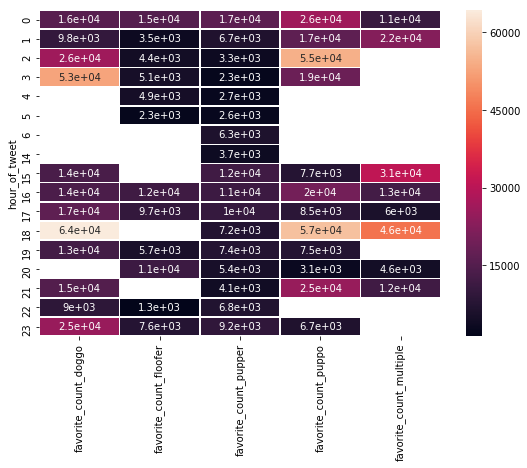

In [122]:
df_alldog_times_likes=df_alldog_times[['favorite_count_doggo','favorite_count_floofer','favorite_count_pupper','favorite_count_puppo','favorite_count_multiple']]

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_alldog_times_likes, annot=True, linewidths=.5, ax=ax)
plt.show()

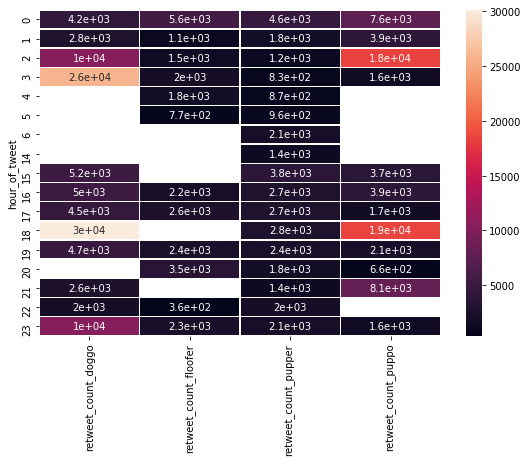

In [123]:
df_alldog_times_likes=df_alldog_times[['retweet_count_doggo','retweet_count_floofer','retweet_count_pupper','retweet_count_puppo']]

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_alldog_times_likes, annot=True, linewidths=.5, ax=ax)
plt.show()

Regarding these figures it seems like the tweets tweeted in the hours 0-3 received the most likes and retweets. White spaces means, that there was no data available, the gap between 3-15 also results due to no tweets tweeted in this time from the account ”WeRateDogs”